Google Çalisma ortami


# Merhaba

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!ls "/gdrive/My Drive/Calisma_Ortami/"

Colab_CalaismaOrtami.ipynb


## Kütüphane kurulumları



In [ ]:
!pip install -q keras

import keras


In [ ]:
!apt-get install graphviz -y #bu sekilde de kurabiliriz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


GPU ÖZELLİKLERİ GÖRÜNTÜLENMESİ



In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import tensorflow_hub as hub

In [ ]:
print("TF version:", tf.__version__)
print("hub version:", hub.__version__)
print("gpu is", "available" if tf.test.is_gpu_available() else "not available")


TF version: 2.3.0
hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
gpu is available


In [ ]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15180157301106605774, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6969354052080490033
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10875283974433174432
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16114361015897004310
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
#!python3 rakam_tanima_CNN_MNIST.py 
#!ls
#yeniden başlamak istediğimizde reset !kill -9 -1 yaparız uzun sürer.


**VEKTÖRLER**

In [2]:
import numpy as np

In [4]:
x = np.array(7)

In [5]:
x

array(7)

In [6]:
x.ndim

0

In [7]:
x = np.array([7,14,21])

In [8]:
x

array([ 7, 14, 21])

In [9]:
x.ndim

1

In [11]:
x =np.array([[7,14,21],
            [7,14,21],
            [7,14,12]])

In [12]:
x

array([[ 7, 14, 21],
       [ 7, 14, 21],
       [ 7, 14, 12]])

TENSORLER

In [15]:
x = np.array([[[7,14,21],
              [7,14,21]],
              [[87,5,6],
               [87,5,6]],
              [[1,2,3],
               [1,2,3]]])

In [16]:
x 

array([[[ 7, 14, 21],
        [ 7, 14, 21]],

       [[87,  5,  6],
        [87,  5,  6]],

       [[ 1,  2,  3],
        [ 1,  2,  3]]])

In [18]:
x.ndim#2den fazla boyut olunca tensor

3

In [20]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [21]:
print(train_images.ndim)

3


In [22]:
print(train_images.shape)

(60000, 28, 28)


In [23]:
print(test_images.ndim)
print(test_images.shape)

3
(10000, 28, 28)


In [24]:
print(train_images.dtype)

uint8


In [25]:
digit = train_images[7] 

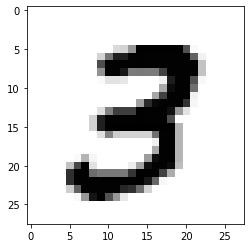

In [29]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [30]:
dizinim = train_images[7:77]

In [31]:
print(dizinim.shape)

(70, 28, 28)


In [32]:
dizinim = train_images[7:77, :, :]

In [33]:
dizinim.shape


(70, 28, 28)

In [34]:
dizinim = train_images[7:77, 0:14, 0:14] #7 den 77 olan görselleri boyut ve genişlikte alabiliriz.

In [35]:
dizinim.shape

(70, 14, 14)

# **İŞLEMLER**

* Eleman Temelli


Bu işlemler tensörün her elemanına ayrı ayrı uygulanır.

In [37]:
def naive_add(x, y):
  assert len(x.shape) == 2 # x ve y 2 boyutlu numpy tensörü
  assert x.shape == y.shape

  x = x.copy() #aynı işlemi giren tensor üzerine tanımlamak için

  for i in range(x.shape[1]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
      return x

In [39]:
x = np.array([[7,14,21],
              [7,14,21],
              [1,2,3]])

y = np.array([[2,2,2],
              [3,3,3],
              [5,5,5]])


In [40]:
z = naive_add(x,y)

In [41]:
z

array([[ 9, 14, 21],
       [ 7, 14, 21],
       [ 1,  2,  3]])

In [42]:
import numpy as np #import numpy kullanınca yukarıdakilere gerek kalmıyor.

In [43]:
x = np.array([[7,14,21],
              [7,14,21],
              [1,2,3]])

y = np.array([[2,2,2],
              [3,3,3],
              [5,5,5]])

In [44]:
z = x+y

In [45]:
z

array([[ 9, 16, 23],
       [10, 17, 24],
       [ 6,  7,  8]])

In [51]:
def naive_relu(x):
  assert len(x.shape) == 2 # x ve y 2 boyutlu numpy tensörü
  assert x.shape == y.shape

  x = x.copy() #aynı işlemi giren tensor üzerine tanımlamak için

  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      x[i, j] = max(x[i, j],0)
      return x

In [47]:
x = np.array([[7,14,21],
              [7,14,21],
              [1,2,3]])

y = np.array([[2,2,2],
              [3,3,3],
              [5,5,5]])

In [56]:
z = naive_relu(x)

In [57]:
z

array([[ 7, 14, 21],
       [ 7, 14, 21],
       [ 1,  2,  3]])

In [53]:
import numpy as np

In [54]:
z = np.maximum(x,0.)

In [55]:
z

array([[ 7., 14., 21.],
       [ 7., 14., 21.],
       [ 1.,  2.,  3.]])

yayma işlemi

In [63]:
def naive_add_matrix_and_vector(x, y):
        assert len(x.shape) == 2
        assert len(y.shape) == 1
        assert x.shape[1] == y.shape[0]

        x = x.copy()

        for i in range(x.shape[0]):
          for j in range(x.shape[1]):
            x[i, j] += y[j]
            return x

In [66]:
x = np.array([[7,14,21],
              [7,14,21],
              [1,2,3]])

y = np.array([2,2,2])

z  = naive_add_matrix_and_vector(x, y)

In [67]:
z

array([[ 9, 14, 21],
       [ 7, 14, 21],
       [ 1,  2,  3]])

In [68]:
import numpy as np


In [69]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

* İç Çarpım İşlemi

In [74]:
import numpy as np

x = np.array([[1, 2],
             [1, 2]])

y = np.array([[1,2,],
             [1, 2]])

z = np.dot(x, y)

In [76]:
z

array([[3, 6],
       [3, 6]])

* Kanal / Şekil Değiştirme

In [79]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [80]:
x = x.reshape((6,1))

In [81]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [82]:
x = x.reshape((2,3))

In [83]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [86]:
x = np.zeros((100, 10))
x = np.transpose(x)

In [87]:
print(x.shape)

(10, 100)
